In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

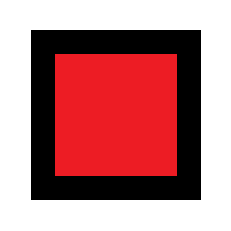

(9, 9, 4)


In [12]:
tiles_path = "tiles/city.png"
img = np.asarray(Image.open(tiles_path))
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

# Get all the tiles

In [13]:
def plot_tiles(list_tiles:list,img=None):
    nb_tiles = len(list_tiles)
    if img is None:
        a,b = nb_tiles//20+1, 20
    else:
        a,b = img.shape[:2]
        a-=2
        b-=2

    fig, axs = plt.subplots(a, b, figsize=(10,10))
    for ax, tile in zip(axs.flat, list_tiles):
        ax.imshow(tile)
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
    plt.show()
    print(f'There is {nb_tiles} tiles in totals')

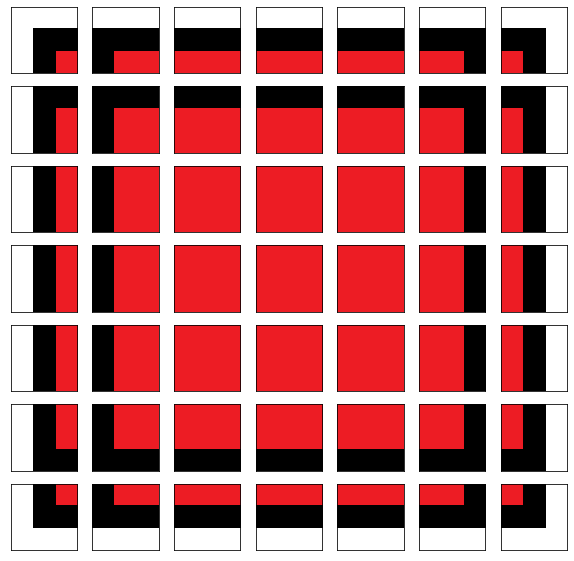

There is 49 tiles in totals


In [14]:
def extract_tiles_from_img(img:np.array, tile_size=(3,3)) -> list:
    extracted_tiles = []
    N,M,_ = img.shape
    for i in range(N-tile_size[0]+1):
        for j in range(M-tile_size[1]+1):
            tile = img[i:i+tile_size[0],j:j+tile_size[1]]
            extracted_tiles.append(tile)
    return extracted_tiles

tiles = extract_tiles_from_img(img)
plot_tiles(tiles, img)

# Get more tiles by rotating the image

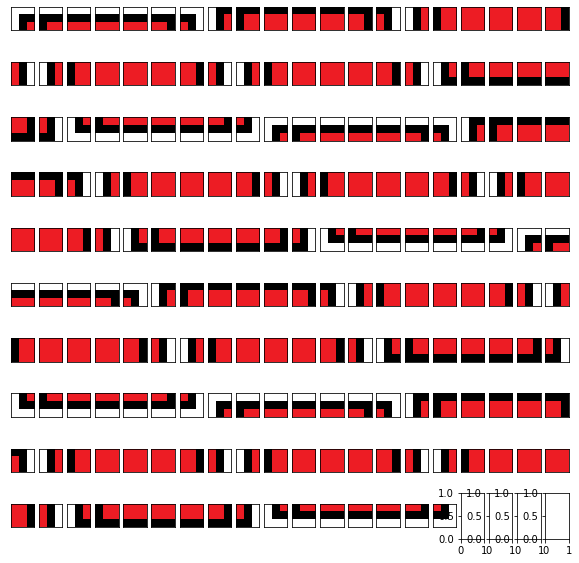

There is 196 tiles in totals


In [15]:
def extract_tiles_from_img_with_rotation(img):
    result = []
    copy = img.copy()
    for _ in range(4):
        result += extract_tiles_from_img(copy)
        copy = np.rot90(copy)
    return result

tiles = extract_tiles_from_img_with_rotation(img)
plot_tiles(tiles)

# Filter for unique Tiles

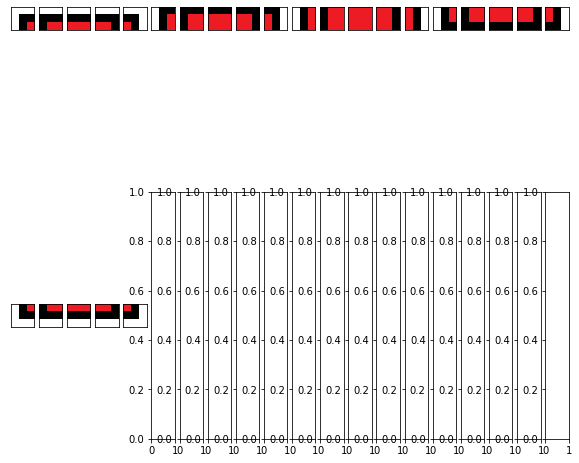

There is 25 tiles in totals


In [16]:
def get_unique_tiles(list_tiles):
    unique = []
    def is_in_list(list,element):
        for elem in list:
            if np.array_equal(elem,element):
                return True
    for tile in list_tiles:
        if not is_in_list(unique,tile):
            unique.append(tile)
    
    return unique

tiles = extract_tiles_from_img_with_rotation(img)
unique = get_unique_tiles(tiles)
plot_tiles(unique)

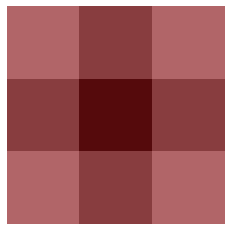

[[[177.12 101.88 104.76 255.  ]
  [136.32  61.08  63.96 255.  ]
  [177.12 101.88 104.76 255.  ]]

 [[136.32  61.08  63.96 255.  ]
  [ 85.32  10.08  12.96 255.  ]
  [136.32  61.08  63.96 255.  ]]

 [[177.12 101.88 104.76 255.  ]
  [136.32  61.08  63.96 255.  ]
  [177.12 101.88 104.76 255.  ]]]


In [23]:
plt.imshow(np.mean(unique,axis=0)/255)
plt.axis('off')
plt.show()
print(np.mean(unique,axis=0))

In [17]:
def frequency_tiles(tiles_list):
    unique_tiles = get_unique_tiles(tiles_list)
    frequency = np.zeros(len(unique_tiles))
    for t1 in tiles_list:
        for idx, t2 in enumerate(unique_tiles):
            if np.array_equal(t1, t2):
                frequency[idx] +=1
    
    return frequency

print(frequency_tiles(tiles))

[ 4.  4. 12.  4.  4.  4.  4. 12.  4.  4. 12. 12. 36. 12. 12.  4.  4. 12.
  4.  4.  4.  4. 12.  4.  4.]


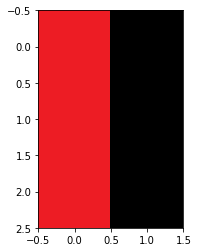

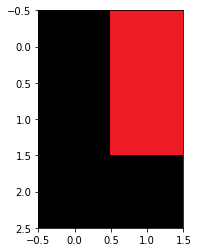

In [18]:
plt.imshow(unique[14][:,:2])
plt.show()
plt.imshow(unique[15][:,1:])
plt.show()

In [19]:
def overlaping_tile_east(tile1, tile2):
    return np.array_equal(tile1[:,1:],tile2[:,:2])

def overlaping_tile_south(tile1, tile2):
    return np.array_equal(tile1[1:,:],tile2[:2,:])

def overlaping_tile_west(tile1, tile2):
    return np.array_equal(tile1[:,:2],tile2[:,1:])

def overlaping_tile_north(tile1, tile2):
    return np.array_equal(tile1[:2,:],tile2[1:,:])



In [20]:
NORTH = 0
EAST = 1
SOUTH = 2
WEST = 3

def evaluate_neighboor(list_tiles):
    neighboor = {i:[[],[],[],[]] for i in range(len(list_tiles))}
    for i, tile1 in enumerate(list_tiles):
        for j, tile2 in enumerate(list_tiles):
            neighboor[i][NORTH].append(j) if overlaping_tile_north(tile1, tile2) else None
            neighboor[i][EAST].append(j) if overlaping_tile_east(tile1, tile2) else None
            neighboor[i][SOUTH].append(j) if overlaping_tile_south(tile1, tile2) else None
            neighboor[i][WEST].append(j) if overlaping_tile_west(tile1, tile2) else None
    
    return neighboor

evaluate_neighboor(unique)

{0: [[], [1], [5], []],
 1: [[], [2, 3], [6], [0]],
 2: [[], [2, 3], [7], [1, 2]],
 3: [[], [4], [8], [1, 2]],
 4: [[], [], [9], [3]],
 5: [[0], [6], [10, 15], []],
 6: [[1], [7, 8], [11, 16], [5]],
 7: [[2], [7, 8], [12, 17], [6, 7]],
 8: [[3], [9], [13, 18], [6, 7]],
 9: [[4], [], [14, 19], [8]],
 10: [[5, 10], [11], [10, 15], []],
 11: [[6, 11], [12, 13], [11, 16], [10]],
 12: [[7, 12], [12, 13], [12, 17], [11, 12]],
 13: [[8, 13], [14], [13, 18], [11, 12]],
 14: [[9, 14], [], [14, 19], [13]],
 15: [[5, 10], [16], [20], []],
 16: [[6, 11], [17, 18], [21], [15]],
 17: [[7, 12], [17, 18], [22], [16, 17]],
 18: [[8, 13], [19], [23], [16, 17]],
 19: [[9, 14], [], [24], [18]],
 20: [[15], [21], [], []],
 21: [[16], [22, 23], [], [20]],
 22: [[17], [22, 23], [], [21, 22]],
 23: [[18], [24], [], [21, 22]],
 24: [[19], [], [], [23]]}